# Overview
Online retail is a transactional data set</a> which contains all the transactions occurring between 01/12/2009 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Business Goal
We aim to segement the Customers based on RFM so that the company can target its customers efficiently.

#### The steps are broadly divided into:

1. [a) Reading and Understanding the Data](#1)
1. [b) Data Cleansing](#2)
1. [c) Data Preparation](#3)
1. [d) EDA](#4)
1. [e) Model Building](#5)
1. [f) Final Analysis](#6)

<a id="1"></a> <br>
## a) Reading and Understanding Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv((r"C:\Users\zerin\Downloads\OnlineRetail (3).csv") , sep=",", encoding="ISO-8859-1", header=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [58]:
df['InvoiceNo'].nunique()

22190

<a id="2"></a> <br>
## b) Data Cleaning:

In [3]:
duplicates_percentage = round(100*(df.duplicated().sum())/len(df), 2)
print(duplicates_percentage)

0.97


In [4]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
missing_percentage = round(100*(df.isnull().sum())/len(df), 2)
print(missing_percentage)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.16
Country         0.00
dtype: float64


In [6]:
df = df.dropna()
df.shape

(401604, 8)

In [7]:
df.isnull().sum().any()

False

<a id="3"></a> <br>
## c) Data Preparation

#### We are going to analysis the Customers based on below 3 factors:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

### Monetary

In [8]:
#total Amount = Quantity * UnitPrice(Price of the product per unit)

df['Amount'] = df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [9]:
# New Attribute : Monetary(total (sum) amount from each unique CustomerID)

rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m
rfm_m = rfm_m.reset_index()
rfm_m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


### Frequency

In [10]:
# New Attribute : Frequency(total count of invoice from each unique CustomerID)

rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,721


In [11]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2045.53,721


In [12]:
from dateutil import parser

# we have some inconsistency in the format of the date strings, so we need to Convert 'InvoiceDate' to datetime using the flexible parser
df['InvoiceDate'] = df['InvoiceDate'].apply(parser.parse)

# Now 'InvoiceDate' column should be standardized


In [13]:
# Compute the maximum date to know the last transaction date
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [14]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


### **Recency**

In [15]:
# Compute last transaction date to get the recency of customers

rfm_r = df.groupby('CustomerID')['Diff'].min()
rfm_r = rfm_r.reset_index()
rfm_r

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [16]:
# Extract number of days only

rfm_r['Diff'] = rfm_r['Diff'].dt.days
rfm_r

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [17]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_r, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2045.53,721,3


<a id="4"></a> <br>
## d) EDA

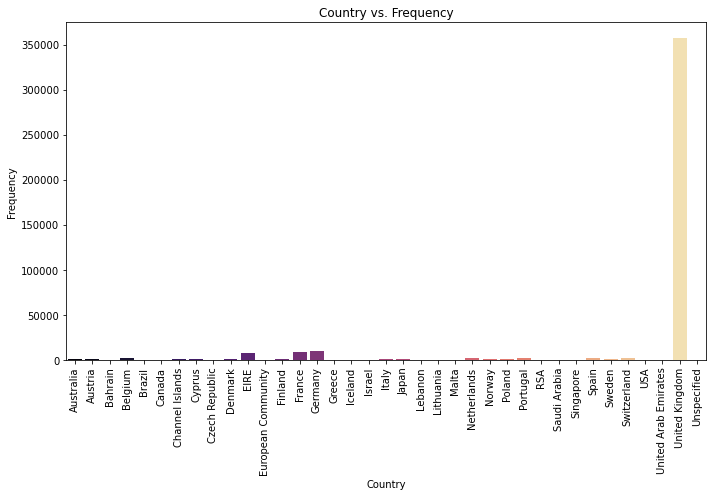

<Figure size 432x288 with 0 Axes>

In [41]:
country_frequency = df.groupby('Country')['InvoiceNo'].count().reset_index()
country_frequency.columns = ['Country','Frequency']

plt.figure(figsize=(10, 7))
sns.barplot(data=country_frequency, x='Country', y='Frequency', palette='magma')
plt.title('Country vs. Frequency')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### The above graphs displays that UK has the major portion of the customers with respect to other countries.

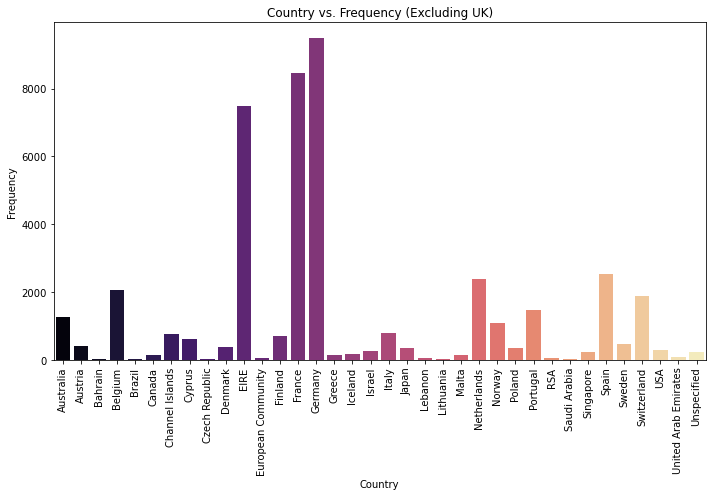

<Figure size 432x288 with 0 Axes>

In [42]:
country_frequency = df[df['Country'] != 'United Kingdom'].groupby('Country')['InvoiceNo'].count().reset_index()
country_frequency.columns = ['Country', 'Frequency']

# Create a bar plot for Country vs. Frequency (excluding UK)
plt.figure(figsize=(10, 7))
sns.barplot(data=country_frequency, x='Country', y='Frequency', palette='magma')
plt.title('Country vs. Frequency (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### The above graphs displays that Germany, France and Ireland are top 3 countries where online retail is working but it’s very low in comparison to UK.

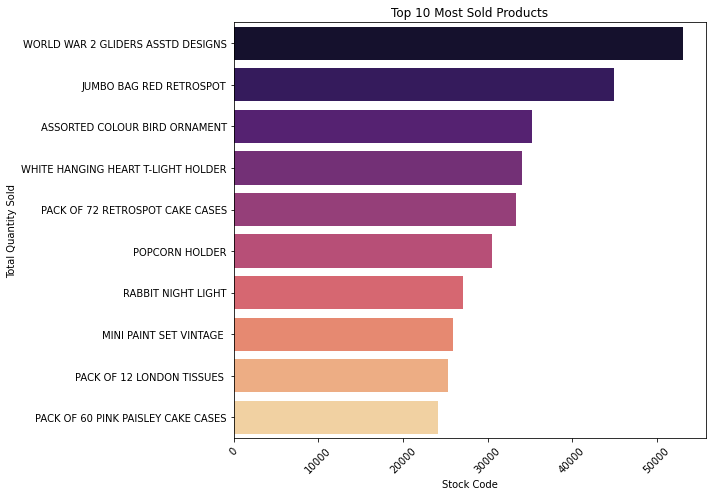

<Figure size 432x288 with 0 Axes>

In [40]:
product_sales = df.groupby(['Description', 'StockCode'])['Quantity'].sum().reset_index()

# Sorting by total quantity sold in descending order
top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Create a bar plot for the top 10 most sold products
plt.figure(figsize=(10, 7))
sns.barplot(data=top_products, y='Description', x='Quantity', palette='magma')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Stock Code')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

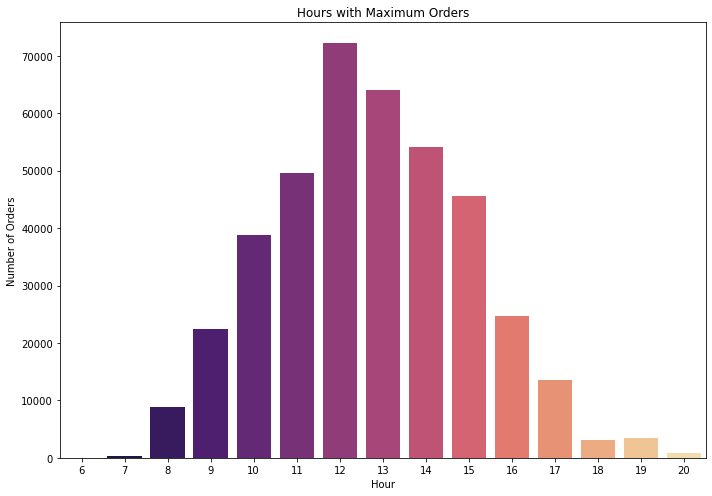

<Figure size 432x288 with 0 Axes>

In [43]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extracting the hour from InvoiceDate
df['OrderHour'] = df['InvoiceDate'].dt.hour

# Grouping by OrderHour and counting the number of orders
hourly_orders = df.groupby('OrderHour')['InvoiceNo'].count().reset_index()

# Sorting by number of orders in descending order
hourly_orders = hourly_orders.sort_values(by='InvoiceNo', ascending=False)

# Create a bar plot for hours with the maximum orders
plt.figure(figsize=(10, 7))
sns.barplot(data=hourly_orders, x='OrderHour', y='InvoiceNo', palette='magma')
plt.title('Hours with Maximum Orders')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

#### The above graph explains that between morning 10 am till 3pm most of the orders are placed on the online portal from every country.

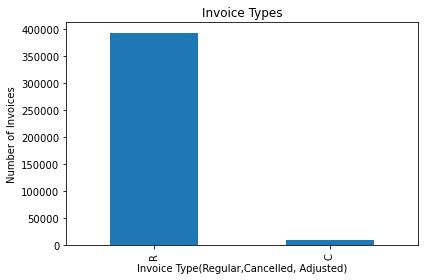

<Figure size 432x288 with 0 Axes>

In [44]:
df['InvoicePrefix'] = df['InvoiceNo'].apply(lambda x: x[0] if x[0].isalpha() else 'R')

# Grouping and counting the invoice types
invoice_counts = df['InvoicePrefix'].value_counts()

# Create a bar plot for Invoice types
plt.figure(figsize=(6, 4))
invoice_counts.plot(kind='bar')
plt.title('Invoice Types')
plt.xlabel('Invoice Type(Regular,Cancelled, Adjusted)')
plt.ylabel('Number of Invoices')

plt.tight_layout()
plt.show()

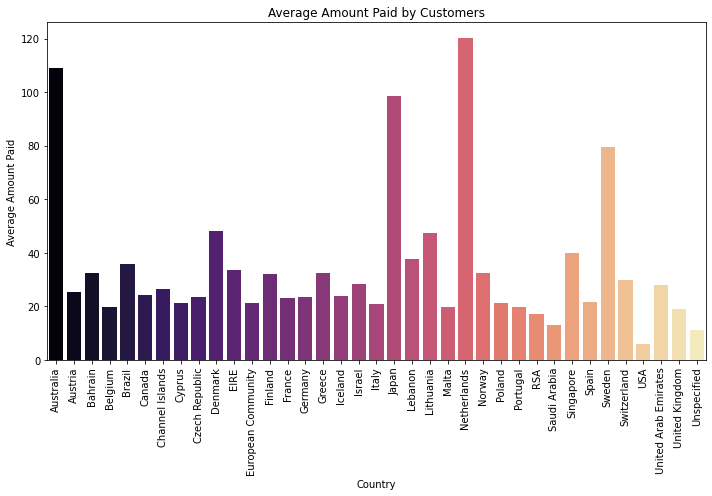

<Figure size 432x288 with 0 Axes>

In [45]:
avg_amount_per_customer = df.groupby('Country')['Amount'].mean().reset_index()

# Create a bar plot for Average amount paid by customers
plt.figure(figsize=(10, 7))
sns.barplot(data=avg_amount_per_customer, x='Country', y='Amount', palette='magma')
plt.title('Average Amount Paid by Customers')
plt.xlabel('Country')
plt.ylabel('Average Amount Paid')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### We noticed that the highest average paid through customer is in Netherlands and lowest amount paid in Saudi Arabia

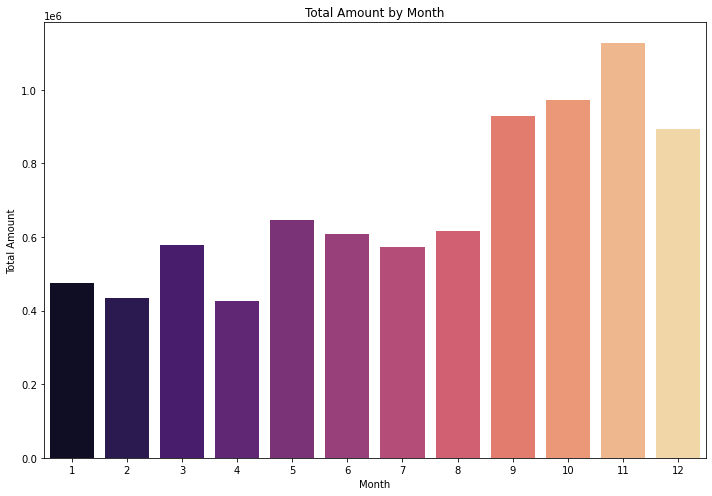

<Figure size 432x288 with 0 Axes>

In [46]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extracting month from InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

# Grouping by month and calculating the total amount
total_amount_by_month = df.groupby('InvoiceMonth')['Amount'].sum().reset_index()

# Finding the month with the highest total amount
highest_total_month = total_amount_by_month[total_amount_by_month['Amount'] == total_amount_by_month['Amount'].max()]

# Create a bar plot for Total amount by month
plt.figure(figsize=(10, 7))
sns.barplot(data=total_amount_by_month, x='InvoiceMonth', y='Amount', palette='magma')
plt.title('Total Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')

plt.tight_layout()
plt.show()

#### So november is the highest month overall months for all countries

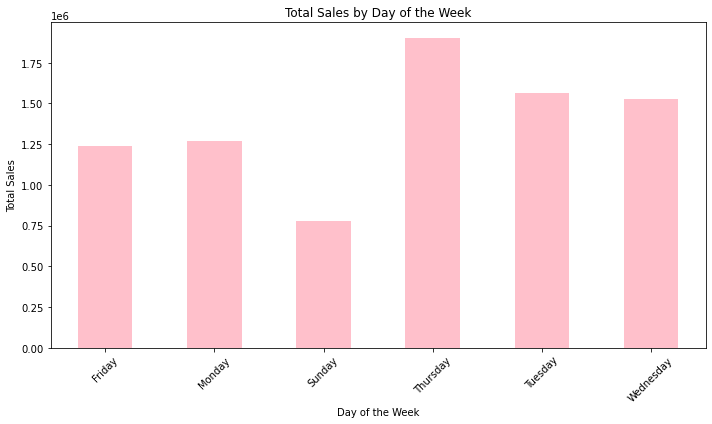

In [53]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
total_sales_by_dayofweek = df.groupby('DayOfWeek')['Amount'].sum()

# Create a plot using Matplotlib
plt.figure(figsize=(10, 6))
total_sales_by_dayofweek.plot(kind='bar', color='pink')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Total Sales by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### The above graph shows that Tuesdays and Thursdays are the days where more Total Sale is happening in comparison to other weekdays. Saturday seems to be off for orders.

## Outlier handling

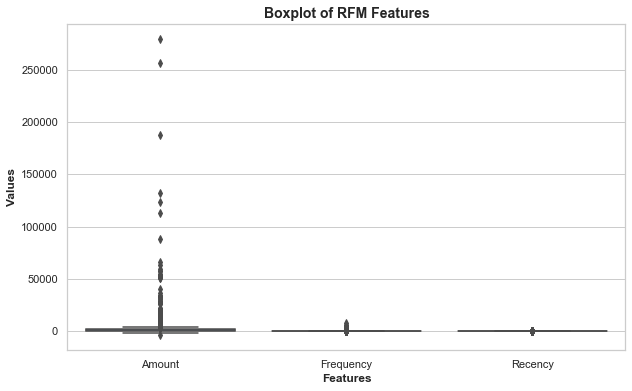

In [18]:
features = ['Amount', 'Frequency', 'Recency']

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(data=rfm[features])

plt.xlabel('Features', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.title('Boxplot of RFM Features', fontsize = 14, fontweight='bold')

plt.show()

In [19]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2045.53,721,3


In [20]:
features = ['Amount', 'Frequency', 'Recency']

r_f_m = rfm.copy()

for i in features:
    Q1 = r_f_m[i].quantile(0.25)
    Q3 = r_f_m[i].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    r_f_m = r_f_m[(r_f_m[i] >= lower_bound) & (r_f_m[i] <= upper_bound)]
    r_f_m = r_f_m.reset_index(drop=True)

display(r_f_m.head())

before_outliers_removed = rfm.shape[0]
after_outliers_removed = r_f_m.shape[0]

print('Before removal of outliers, the dataset had {} samples.'.format(before_outliers_removed))
print('After removal of outliers, the dataset now has {} samples.'.format(after_outliers_removed))

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12348.0,1797.24,31,74
2,12349.0,1757.55,73,18
3,12350.0,334.40,17,309
4,12352.0,1545.41,95,35


Before removal of outliers, the dataset had 4372 samples.
After removal of outliers, the dataset now has 3702 samples.


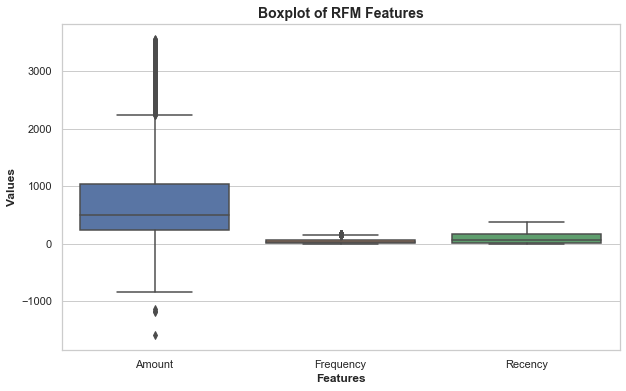

In [21]:
features = ['Amount', 'Frequency', 'Recency']

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(data=r_f_m[features])

plt.xlabel('Features', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.title('Boxplot of RFM Features', fontsize = 14, fontweight='bold')

plt.show()

### Rescaling the Attributes
It is extremely important to rescale the variables so that they have a comparable scale.| There are two common ways of rescaling:

   1. Min-Max scaling
   2. Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [22]:
from sklearn.preprocessing import StandardScaler

rfm_df = r_f_m[['Amount', 'Frequency', 'Recency']]

scaler = StandardScaler()

# fit_transform
rfm_scaled = scaler.fit_transform(rfm_df)
rfm_scaled

array([[-1.04176195, -1.07413759,  2.13727356],
       [ 1.39975609, -0.37022813, -0.28178068],
       [ 1.34583794,  0.64922695, -0.82148999],
       ...,
       [-0.93196944, -0.95277389,  0.73981194],
       [-0.80185404, -0.80713745, -0.92750432],
       [ 1.45414971,  0.57640873, -0.590186  ]])

In [23]:
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_scaled

,Amount,Frequency,Recency
0,-1.041762,-1.074138,2.137274
1,1.399756,-0.370228,-0.281781
2,1.345838,0.649227,-0.821490
3,-0.587486,-0.710046,1.983071
4,1.057650,1.183227,-0.657650
...,...,...,...
3697,-0.805522,-0.904228,-0.291418
3698,-0.796420,-0.879956,1.674666
3699,-0.931969,-0.952774,0.739812
3700,-0.801854,-0.807137,-0.927504


<a id="5"></a> <br>
## e) Building the Model

## K-Means Clustering:

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

In [24]:
# k-means with some arbitrary k

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [25]:
kmeans

KMeans(max_iter=50, n_clusters=4)

### Finding the Optimal Number of Clusters

#### Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

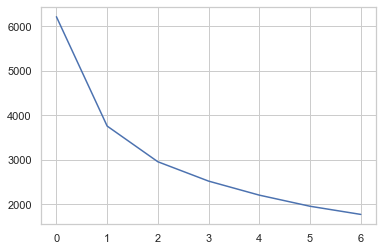

In [26]:
# Elbow-curve/SSD

wcss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,init = 'k-means++', max_iter=50)
    kmeans.fit(rfm_scaled)
    
    wcss.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(wcss)

### Silhouette Analysis

In [27]:
# Silhouette analysis
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4300291515793741
For n_clusters=3, the silhouette score is 0.4402041407257191
For n_clusters=4, the silhouette score is 0.40781512100560696
For n_clusters=5, the silhouette score is 0.3890875500731565
For n_clusters=6, the silhouette score is 0.3518315533321383
For n_clusters=7, the silhouette score is 0.332984042460474
For n_clusters=8, the silhouette score is 0.34314000785041204


In [28]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [29]:
 kmeans.labels_

array([2, 0, 1, ..., 2, 0, 1])

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(rfm_scaled)

# Extract the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[-0.28287706, -0.29016784, -0.50131133],
       [-0.59910039, -0.6278677 ,  1.45886093],
       [ 1.47071755,  1.52543204, -0.57286813]])

In [31]:
# assign the label
r_f_m['Cluster_Id'] = kmeans.labels_
r_f_m

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12348.0,1797.24,31,74,0
2,12349.0,1757.55,73,18,2
3,12350.0,334.40,17,309,1
4,12352.0,1545.41,95,35,2
...,...,...,...,...,...
3697,18278.0,173.90,9,73,0
3698,18280.0,180.60,10,277,1
3699,18281.0,80.82,7,180,1
3700,18282.0,176.60,13,7,0


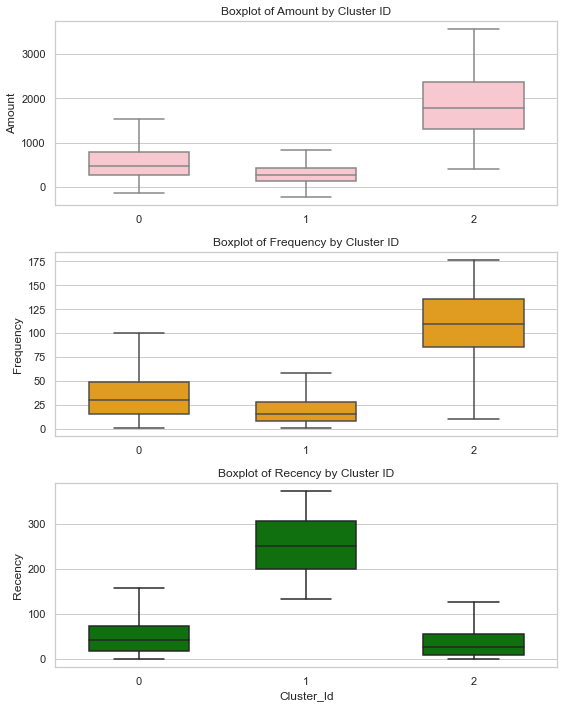

In [32]:
# Box plot to visualize Cluster Id vs Amount,Frequency,Recency

plt.figure(figsize=(8, 10))
sns.set(style="whitegrid")

plt.subplot(3, 1, 1)
sns.boxplot(data=r_f_m, x='Cluster_Id', y='Amount', color='pink', width=0.6, showfliers=False)
plt.xlabel('')
plt.ylabel('Amount')
plt.title('Boxplot of Amount by Cluster ID')

plt.subplot(3, 1, 2)
sns.boxplot(data=r_f_m, x='Cluster_Id', y='Frequency', color='orange', width=0.6, showfliers=False)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Boxplot of Frequency by Cluster ID')

plt.subplot(3, 1, 3)
sns.boxplot(data=r_f_m, x='Cluster_Id', y='Recency', color='green', width=0.6, showfliers=False)
plt.ylabel('Recency')
plt.title('Boxplot of Recency by Cluster ID')

plt.tight_layout()

plt.show()

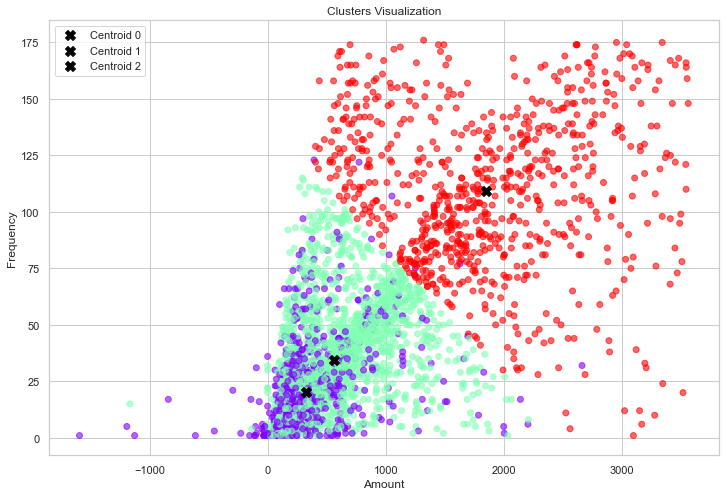

In [55]:
plt.figure(figsize=(12, 8))

# Create scatter plot colored by cluster
scatter = plt.scatter(r_f_m['Amount'], r_f_m['Frequency'], c=r_f_m['Cluster_Id'], cmap='rainbow', alpha=0.6)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Clusters Visualization')

# Plot centroids
for cluster_id in r_f_m['Cluster_Id'].unique():
    centroid = r_f_m[r_f_m['Cluster_Id'] == cluster_id][['Amount', 'Frequency']].mean()
    plt.scatter(centroid['Amount'], centroid['Frequency'], color='black', marker='X', s=100, label=f'Centroid {cluster_id}')

plt.legend()

plt.show()


### Hierarchical Clustering

In [38]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

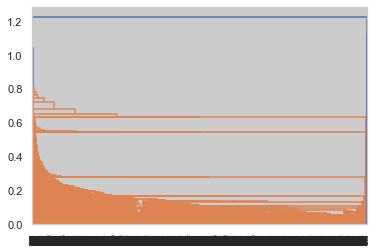

In [39]:
# Single linkage: 

mergings = linkage(rfm_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

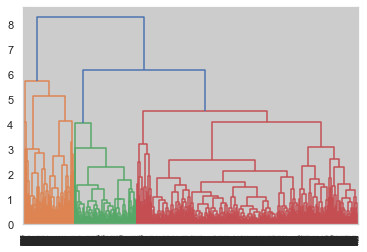

In [36]:
# Complete linkage

mergings = linkage(rfm_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

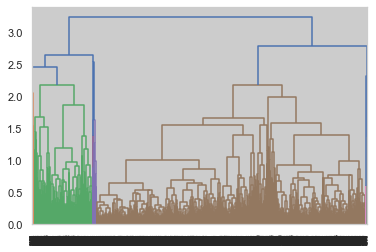

In [37]:
# Average linkage

mergings = linkage(rfm_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

### Cutting the Dendrogram based on K

In [38]:
# 3 clusters

from scipy.cluster.hierarchy import cut_tree

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 1, ..., 0, 0, 1])

In [39]:
# Assign cluster labels

r_f_m['Cluster_Labels'] = cluster_labels
r_f_m

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,0,0
1,12348.0,1797.24,31,74,1,0
2,12349.0,1757.55,73,18,2,1
3,12350.0,334.40,17,309,0,0
4,12352.0,1545.41,95,35,2,1
...,...,...,...,...,...,...
3697,18278.0,173.90,9,73,1,0
3698,18280.0,180.60,10,277,0,0
3699,18281.0,80.82,7,180,0,0
3700,18282.0,176.60,13,7,1,0


In [40]:
r_f_m['Cluster_Labels'].value_counts()

0    2982
1     713
2       7
Name: Cluster_Labels, dtype: int64

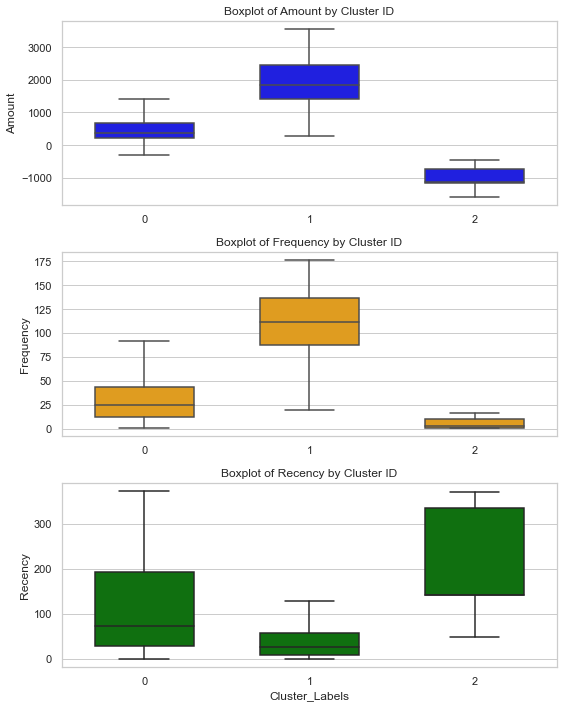

In [41]:
# Box plot to visualize Cluster Id vs Amount,Frequency,Recency

plt.figure(figsize=(8, 10))
sns.set(style="whitegrid")

plt.subplot(3, 1, 1)
sns.boxplot(data=r_f_m, x='Cluster_Labels', y='Amount', color='blue', width=0.6, showfliers=False)
plt.xlabel('')
plt.ylabel('Amount')
plt.title('Boxplot of Amount by Cluster ID')

plt.subplot(3, 1, 2)
sns.boxplot(data=r_f_m, x='Cluster_Labels', y='Frequency', color='orange', width=0.6, showfliers=False)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Boxplot of Frequency by Cluster ID')

plt.subplot(3, 1, 3)
sns.boxplot(data=r_f_m, x='Cluster_Labels', y='Recency', color='green', width=0.6, showfliers=False)
plt.ylabel('Recency')
plt.title('Boxplot of Recency by Cluster ID')

plt.tight_layout()

plt.show()

<a id="6"></a> <br>
## f) Final Analysis

### Inference:
K-Means Clustering with 3 Cluster Ids
- Customers with Cluster Id 2 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster Id 2 are frequent buyers.
- Customers with Cluster Id 1 are not recent buyers and hence least of importance from business point of view.

### Hierarchical Clustering with 3 Cluster Labels
- Customers with Cluster_Labels 1 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster_Labels 1 are frequent buyers.
- Customers with Cluster_Labels 2 are not recent buyers and hence least of importance from business point of view.